# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [19]:
import numpy as np
l = """2 2 1 3 4 2 1 1 3 3 4 3 2 4 2 1 4 3 1 4 
       0 4 2 3 4 3 7 1 3 3 3 4 3 2 1 2 3 3 1 5
       3 0 2 1 2 3 0 0 3 6 2 4 3 4 2 4 1 2 0 3
       1 0 0 2"""
a = [int(s) for s in l.split()]
an = np.array(a)
an


array([2, 2, 1, 3, 4, 2, 1, 1, 3, 3, 4, 3, 2, 4, 2, 1, 4, 3, 1, 4, 0, 4, 2,
       3, 4, 3, 7, 1, 3, 3, 3, 4, 3, 2, 1, 2, 3, 3, 1, 5, 3, 0, 2, 1, 2, 3,
       0, 0, 3, 6, 2, 4, 3, 4, 2, 4, 1, 2, 0, 3, 1, 0, 0, 2])

абсолютні частоти

In [20]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7]
[7, 11, 14, 18, 11, 1, 1, 1]


Варіаційний ряд відносних частот

In [21]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7]
[7, 11, 14, 18, 11, 1, 1, 1]
[0.109, 0.172, 0.219, 0.281, 0.172, 0.016, 0.016, 0.016]


Накопичені частоти

In [22]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.109,  0.281,  0.5  ,  0.781,  0.953,  0.969,  0.985,  1.001])

Складемо другу статистичну таблицю

In [129]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(8), 'Абсолютні частоти': l_values, 'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,7,0,0.109,0.109
1,11,1,0.172,0.281
2,14,2,0.219,0.500
3,18,3,0.281,0.781
4,11,4,0.172,0.953
5,1,5,0.016,0.969
6,1,6,0.016,0.985
7,1,7,0.016,1.001


$x_i * n_i$

In [130]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0, 11, 28, 54, 44,  5,  6,  7])

$\lambda$


In [141]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

155
64


2.421875

$\lambda^i$

In [148]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([   1.        ,    2.421875  ,    5.86547852,   14.20545578,
         34.40383822,   83.32179568,  201.79497392,  488.72220246])

i!

In [143]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([   1,    1,    2,    6,   24,  120,  720, 5040])

$e^h$

In [144]:
np.exp(1)
e_h = np.power(np.full((8), np.exp(1)), lambdaa * -1)
e_h

array([ 0.08875505,  0.08875505,  0.08875505,  0.08875505,  0.08875505,
        0.08875505,  0.08875505,  0.08875505])

$P_i$

In [145]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.08875505,  0.21495363,  0.26029541,  0.21013431,  0.12722976,
        0.06162691,  0.02487545,  0.00860646])

Ni`=Ni*Pi

In [138]:
Ni = np.full((8), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(8, array(64)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([  5.68032292,  13.75703207,  16.65890603,  13.44859601,
         8.14270462,   3.94412255,   1.59202863,   0.55081348])

Ni-Ni`

In [139]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 1.31967708, -2.75703207, -2.65890603,  4.55140399,  2.85729538,
       -2.94412255, -0.59202863,  0.44918652])

Ni-Ni`*Ni-Ni`

In [95]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([  1.74154759,   7.60122586,   7.06978126,  20.71527827,
         8.16413691,   8.66785758,   0.3504979 ,   0.20176853])

Ni-Ni`*Ni-Ni`/n`i

In [97]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([ 0.30659306,  0.55253385,  0.42438449,  1.54033018,  1.00263209,
        2.19766437,  0.22015804,  0.36631008])

In [100]:
abs_Ni_2_Ni.sum()

6.6106061455420182

In [154]:
import math
(abs_Ni_2_Ni.sum() - 6) / math.sqrt(2 * 6)

0.17626681124876201

Вторинна таблиця розподілу: 

In [147]:
x = pd.DataFrame({'Варіанта': range(8), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,5.680323,0.088755,1.000000,0.088755,0,1.319677,1.741548,0.306593,1,0
1,13.757032,0.214954,2.421875,0.088755,11,-2.757032,7.601226,0.552534,1,1
2,16.658906,0.260295,5.865479,0.088755,28,-2.658906,7.069781,0.424384,2,2
3,13.448596,0.210134,14.205456,0.088755,54,4.551404,20.715278,1.540330,6,3
4,8.142705,0.127230,34.403838,0.088755,44,2.857295,8.164137,1.002632,24,4
5,3.944123,0.061627,83.321796,0.088755,5,-2.944123,8.667858,2.197664,120,5
6,1.592029,0.024875,201.794974,0.088755,6,-0.592029,0.350498,0.220158,720,6
7,0.550813,0.008606,488.722202,0.088755,7,0.449187,0.201769,0.366310,5040,7


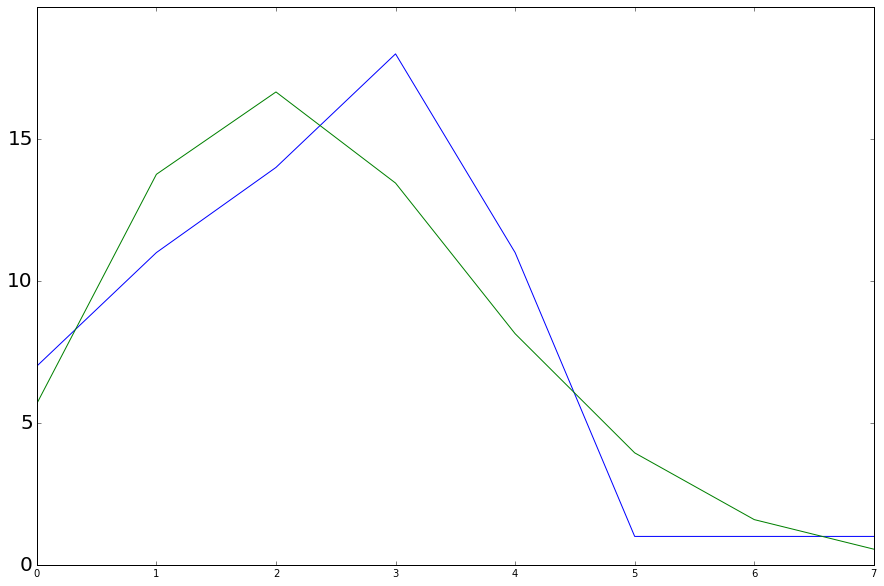

In [128]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 10
plt.xlim(0, len(l_keys) - 1)
plt.ylim(0, max(Ni) + 3)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()